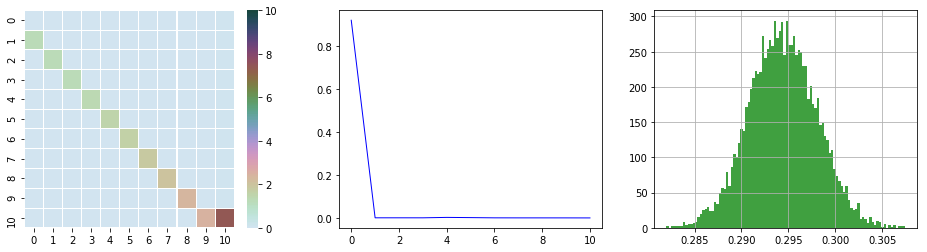

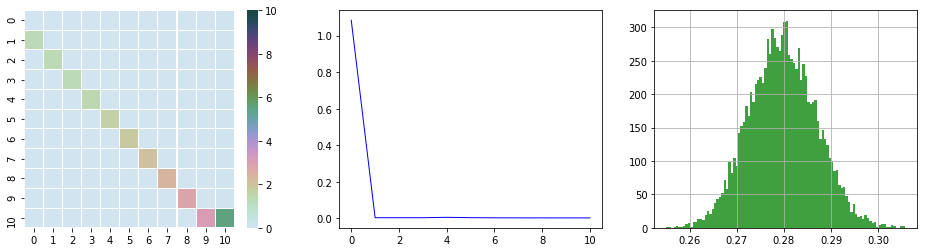

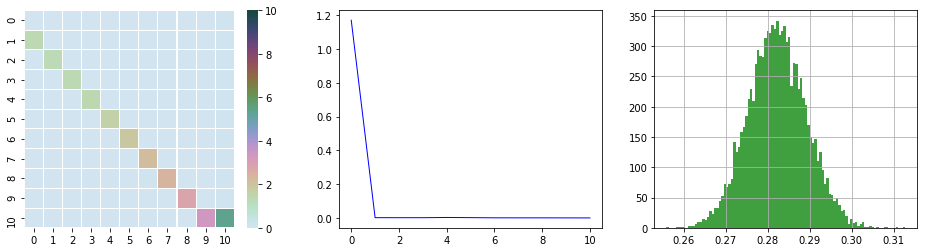

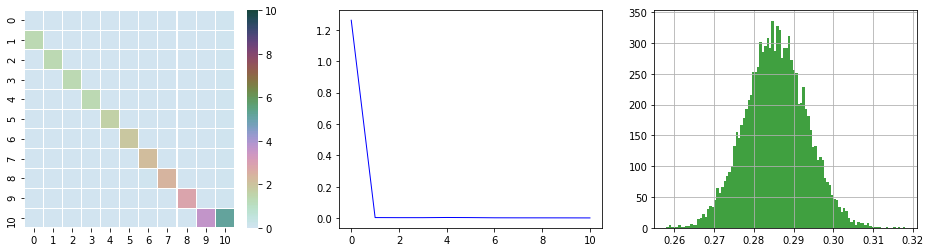

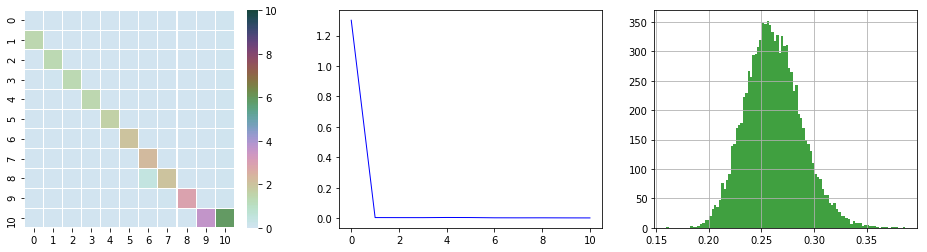

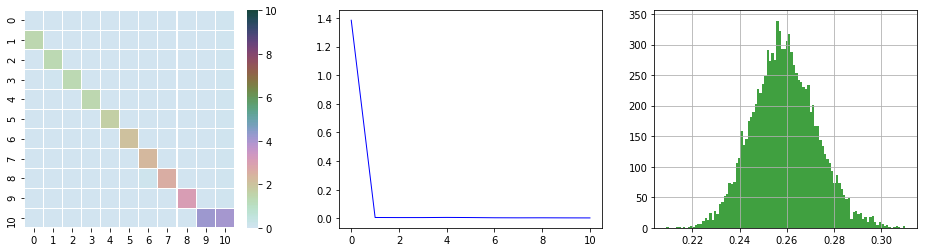

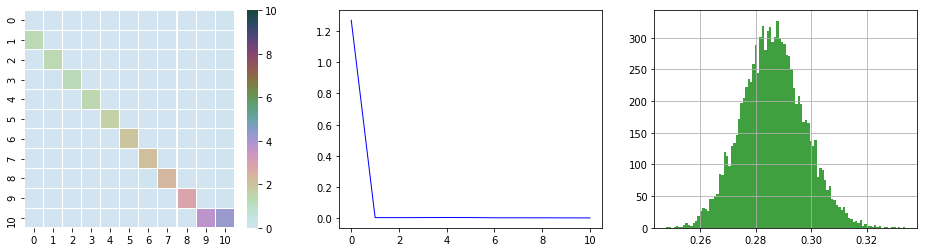

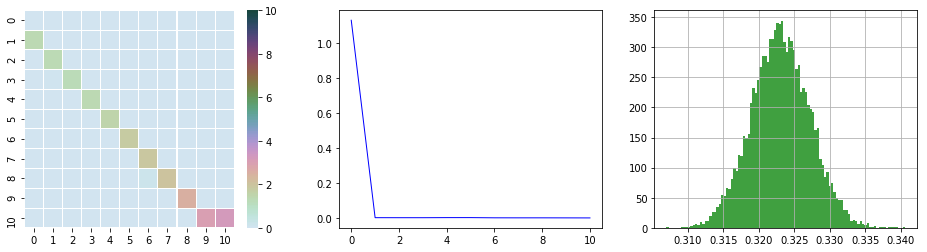

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np
import json

param_filename_list = ['s002_0-50.json', 
                       's002_50-100.json',
                      's002_100-150.json',
                      's002_150-200.json',
                      's002_200-250.json',
                      's002_250-300.json',
                      's002_300-350.json',
                      's002_350-400.json'
                      ]

path = './result/decay0.9+1e-04+c1/'

#param_filename_list += path

for index,list_item in enumerate(param_filename_list):
    param_filename_list[index] = path + param_filename_list[index]
    
    
#读取模型参数
for param_filename in param_filename_list:
    with open(param_filename,'r') as param_file:
        param_dict = json.load(param_file)        
        
    adjacency = np.array(param_dict['vi_exp']['adjacency']).reshape(11,11)
    #print(adjacency)
    mu = np.array(param_dict['vi_exp']['mu']).tolist()
    #print(mu.tolist())
    #print(mu)
    nu =  param_dict['vi_exp']['nu']
    sigma =  param_dict['vi_exp']['sigma']
    
    f, (ax1,ax2,ax3) = plt.subplots(figsize = (16,4), nrows=1, ncols = 3)
    
    cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
    #sns.heatmap(adjacency, linewidths = 0.05, vmax=10, vmin=0, cmap='Reds', center=None, robust=False, annot=False)
    sns.heatmap(adjacency, linewidths = 0.05, vmax=10, vmin=0, ax = ax1, cmap=cmap, center=None, robust=False, annot=False)
    
    #x = np.linspace(0, 11, 11)
    x = [i for i in range(11)] 
    ax2.plot(x,mu,color="blue",linewidth=1)
    
    super_x = np.random.lognormal(nu,sigma,10000)
    n, bins, patches = ax3.hist(super_x,bins=100,facecolor='g', alpha=0.75)
    #y = mlab.normpdf( bins, nu, sigma)
    #ax3.plot(bins, y, 'r--', linewidth=1)
    ax3.grid(True)
    
    plt.show()